In [1]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D , GlobalAveragePooling2D, concatenate, Input
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

In [2]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)

['./ImagesDataset/Train/BlackDot', './ImagesDataset/Train/BlackWhip', './ImagesDataset/Train/LeafBurn', './ImagesDataset/Train/RedLine', './ImagesDataset/Train/RingLeaf', './ImagesDataset/Train/RustMold', './ImagesDataset/Train/StreakMosaic', './ImagesDataset/Train/YellowLeaf']
['./ImagesDataset/Test/BlackDot', './ImagesDataset/Test/BlackWhip', './ImagesDataset/Test/LeafBurn', './ImagesDataset/Test/RedLine', './ImagesDataset/Test/RingLeaf', './ImagesDataset/Test/RustMold', './ImagesDataset/Test/StreakMosaic', './ImagesDataset/Test/YellowLeaf']


In [3]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3] # การเข้าถึง ท่อนแบ่งด้วย /
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

 22%|██▏       | 88/400 [00:26<01:17,  4.03it/s]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 128, 128, 3)
(3200, 8)
(800, 128, 128, 3)
(800, 8)


MobilenetV2

Epoch 1/10
100/100 [==============================] - 26s 217ms/step - loss: 0.5398 - accuracy: 0.9150 - val_loss: 0.2651 - val_accuracy: 0.9225
Epoch 2/10
100/100 [==============================] - 20s 205ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.2823 - val_accuracy: 0.9150
Epoch 3/10
100/100 [==============================] - 20s 205ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9287
Epoch 4/10
100/100 [==============================] - 21s 209ms/step - loss: 3.9243e-04 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 0.9388
Epoch 5/10
100/100 [==============================] - 20s 205ms/step - loss: 2.3854e-04 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 0.9362
Epoch 6/10
100/100 [==============================] - 20s 205ms/step - loss: 1.6061e-04 - accuracy: 1.0000 - val_loss: 0.1816 - val_accuracy: 0.9362
Epoch 7/10
100/100 [==============================] - 21s 209ms/step - loss: 1.1765e-04 - accuracy: 1.0000 - val_loss:

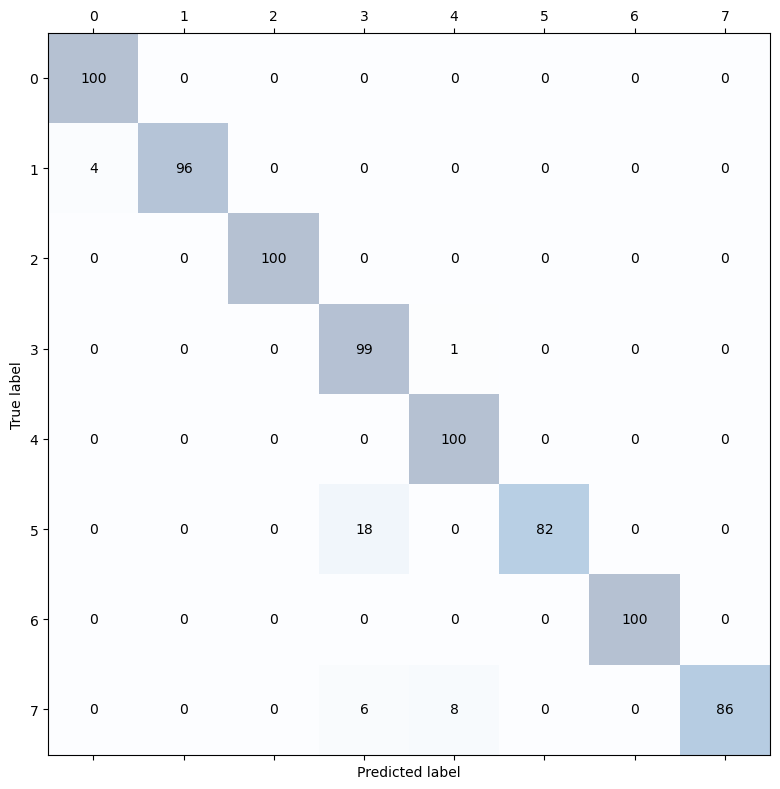

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       1.00      0.96      0.98       100
           2       1.00      1.00      1.00       100
           3       0.80      0.99      0.89       100
           4       0.92      1.00      0.96       100
           5       1.00      0.82      0.90       100
           6       1.00      1.00      1.00       100
           7       1.00      0.86      0.92       100

    accuracy                           0.95       800
   macro avg       0.96      0.95      0.95       800
weighted avg       0.96      0.95      0.95       800



In [ ]:
# โหลด MobilenetV2 model มาจาก tensorflow hub
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False, weights='imagenet')
mobilenetModel.trainable = False

# สร้าง model ใหม่ โดยเพิ่ม layer ต่อจาก model ที่โหลดมา
mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(MaxPool2D(2))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(8, activation='softmax'))

# กำหนดตัวแปรในการ train model
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy'])
mobilenetModelModify.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
mobilenetPred = mobilenetModelModify.predict(x_test)
mobilenetPred = np.argmax(mobilenetPred ,axis=1)
# print(len(y_pred))
# print(y_pred)

# ฟังก์ชันแปลง array 2d เป็น array 1d เพื่อแปลงค่า label ให้เป็นตัวเลข 0-7
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
mobilenetPredictLabels = convert_to_1d_array(mobilenetPred)
# print(resaultPredictLabels)

# สร้าง array ขนาด 800 ตัวเลข 0 เพื่อเก็บค่า label จริง
true_labels = np.zeros(800, dtype=int)
for i in range(8):
    true_labels[i*100:(i+1)*100] = i
# Print the array
# print(len(true_labels))


# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
confusion_matrix = confusion_matrix(true_labels, mobilenetPredictLabels)
# Accuracy_score
accuracy_score = accuracy_score(true_labels, mobilenetPredictLabels)
# Recall_score
recall_score = recall_score(true_labels, mobilenetPredictLabels, average='macro')
# resaultPredict
f1_score = f1_score(true_labels, mobilenetPredictLabels, average='macro')
# Classification_report
classification_report = classification_report(true_labels, mobilenetPredictLabels)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(classification_report)



LeNet-5

Epoch 1/10
100/100 [==============================] - 40s 393ms/step - loss: 1.1450 - accuracy: 0.5878 - val_loss: 1.0591 - val_accuracy: 0.7312
Epoch 2/10
100/100 [==============================] - 39s 385ms/step - loss: 0.1229 - accuracy: 0.9625 - val_loss: 1.1552 - val_accuracy: 0.7750
Epoch 3/10
100/100 [==============================] - 39s 386ms/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 1.0713 - val_accuracy: 0.7775
Epoch 4/10
100/100 [==============================] - 38s 385ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 1.5534 - val_accuracy: 0.6162
Epoch 5/10
100/100 [==============================] - 39s 386ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 1.7472 - val_accuracy: 0.7412
Epoch 6/10
100/100 [==============================] - 39s 386ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 1.2987 - val_accuracy: 0.8363
Epoch 7/10
100/100 [==============================] - 38s 384ms/step - loss: 5.9439e-04 - accuracy: 1.0000 - val_loss: 1.6269 - va

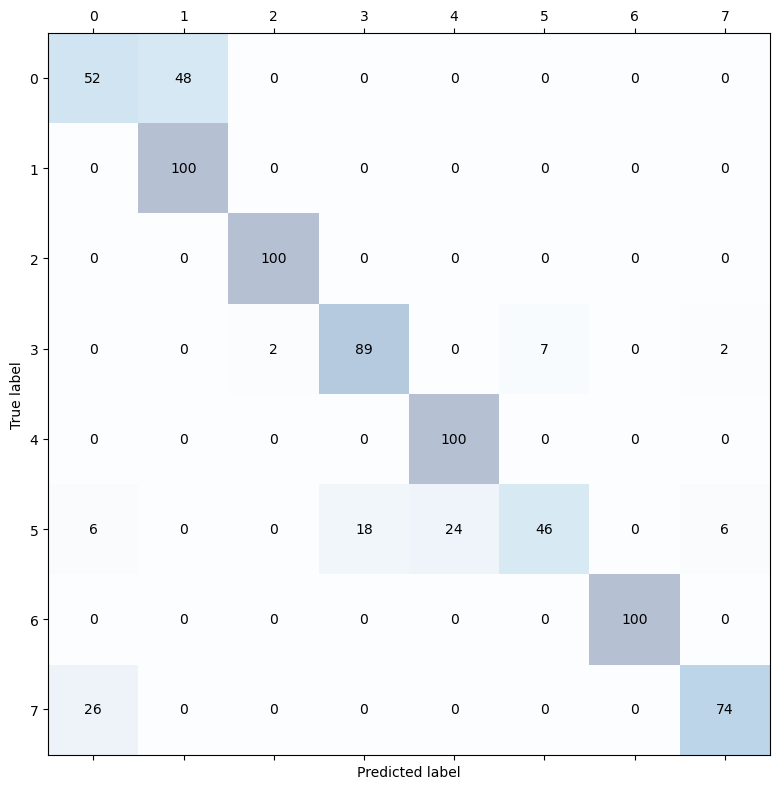

              precision    recall  f1-score   support

           0       0.62      0.52      0.57       100
           1       0.68      1.00      0.81       100
           2       0.98      1.00      0.99       100
           3       0.83      0.89      0.86       100
           4       0.81      1.00      0.89       100
           5       0.87      0.46      0.60       100
           6       1.00      1.00      1.00       100
           7       0.90      0.74      0.81       100

    accuracy                           0.83       800
   macro avg       0.84      0.83      0.82       800
weighted avg       0.84      0.83      0.82       800



In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

LeNet_5_Model = Sequential()
LeNet_5_Model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Flatten())
LeNet_5_Model.add(Dense(256, activation='relu'))
LeNet_5_Model.add(Dense(84, activation='relu'))
LeNet_5_Model.add(Dense(8, activation='softmax'))

LeNet_5_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet_5_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
LeNet_5_ModelPred = LeNet_5_Model.predict(x_test)
LeNet_5_ModelPred = np.argmax(LeNet_5_ModelPred ,axis=1)
# print(len(LeNet_5_ModelPred))
# print(LeNet_5_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
LeNet_5_ModelPredLabel = convert_to_1d_array(LeNet_5_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
LeNet_confusion_matrix = confusion_matrix(true_labels, LeNet_5_ModelPredLabel)
# Accuracy_score
LeNet_accuracy_score = accuracy_score(true_labels, LeNet_5_ModelPredLabel)
# Recall_score
LeNet_recall_score = recall_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# resaultPredict
LeNet_f1_score = f1_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# Classification_report
LeNet_classification_report = classification_report(true_labels, LeNet_5_ModelPredLabel)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(LeNet_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LeNet_confusion_matrix.shape[0]):
    for j in range(LeNet_confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=LeNet_confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(LeNet_classification_report)

AlexNet

Epoch 1/10
100/100 [==============================] - 59s 575ms/step - loss: 2.0860 - accuracy: 0.1347 - val_loss: 2.1404 - val_accuracy: 0.1550
Epoch 2/10
100/100 [==============================] - 55s 549ms/step - loss: 1.5068 - accuracy: 0.4147 - val_loss: 1.3724 - val_accuracy: 0.5125
Epoch 3/10
100/100 [==============================] - 55s 552ms/step - loss: 1.0522 - accuracy: 0.6288 - val_loss: 1.7332 - val_accuracy: 0.4775
Epoch 4/10
100/100 [==============================] - 54s 545ms/step - loss: 0.7394 - accuracy: 0.7378 - val_loss: 2.1907 - val_accuracy: 0.4950
Epoch 5/10
100/100 [==============================] - 55s 551ms/step - loss: 0.5201 - accuracy: 0.8188 - val_loss: 2.0244 - val_accuracy: 0.5350
Epoch 6/10
100/100 [==============================] - 54s 545ms/step - loss: 0.3609 - accuracy: 0.8828 - val_loss: 1.8719 - val_accuracy: 0.5738
Epoch 7/10
100/100 [==============================] - 56s 557ms/step - loss: 0.3371 - accuracy: 0.8934 - val_loss: 1.4932 - val_ac

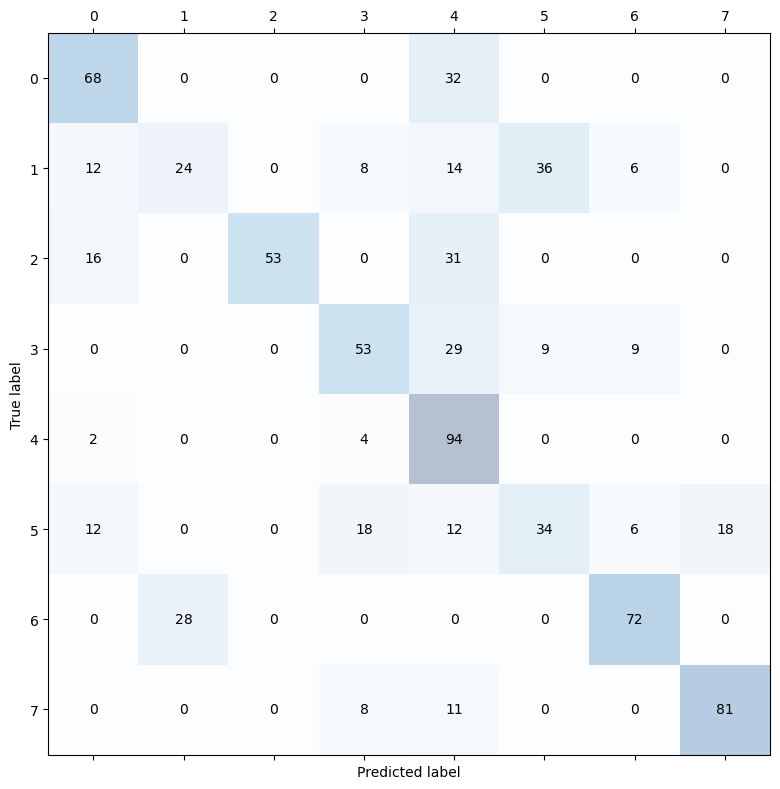

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       100
           1       0.46      0.24      0.32       100
           2       1.00      0.53      0.69       100
           3       0.58      0.53      0.55       100
           4       0.42      0.94      0.58       100
           5       0.43      0.34      0.38       100
           6       0.77      0.72      0.75       100
           7       0.82      0.81      0.81       100

    accuracy                           0.60       800
   macro avg       0.64      0.60      0.59       800
weighted avg       0.64      0.60      0.59       800



In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

AlexNet_Model = Sequential()
AlexNet_Model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid', input_shape=(128,128,3)))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Flatten())
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(8, activation='softmax'))

AlexNet_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
AlexNet_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
AlexNet_ModelPred = AlexNet_Model.predict(x_test)
AlexNet_ModelPred = np.argmax(AlexNet_ModelPred ,axis=1)
# print(len(AlexNet_ModelPred))
# print(AlexNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
AlexNet_ModelPredLabel = convert_to_1d_array(AlexNet_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
AlexNetconfusion_matrix = confusion_matrix(true_labels, AlexNet_ModelPredLabel)
# Accuracy_score
AlexNetaccuracy_score = accuracy_score(true_labels, AlexNet_ModelPredLabel)
# Recall_score
AlexNetrecall_score = recall_score(true_labels, AlexNet_ModelPredLabel, average='macro')
# resaultPredict
AlexNetf1_score = f1_score(true_labels, AlexNet_ModelPredLabel, average='macro' )
# Classification_report
AlexNetlassification_report = classification_report(true_labels, AlexNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(AlexNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(AlexNetconfusion_matrix.shape[0]):
    for j in range(AlexNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=AlexNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(AlexNetlassification_report)


Inception

Epoch 1/10
100/100 [==============================] - 87s 859ms/step - loss: 1.8462 - accuracy: 0.2425 - val_loss: 1.5328 - val_accuracy: 0.3413
Epoch 2/10
100/100 [==============================] - 82s 820ms/step - loss: 1.2911 - accuracy: 0.4975 - val_loss: 1.3810 - val_accuracy: 0.4450
Epoch 3/10
100/100 [==============================] - 79s 793ms/step - loss: 1.1267 - accuracy: 0.5819 - val_loss: 1.2037 - val_accuracy: 0.5387
Epoch 4/10
100/100 [==============================] - 79s 793ms/step - loss: 1.0175 - accuracy: 0.6241 - val_loss: 1.2006 - val_accuracy: 0.5337
Epoch 5/10
100/100 [==============================] - 86s 859ms/step - loss: 0.9258 - accuracy: 0.6612 - val_loss: 1.2912 - val_accuracy: 0.4800
Epoch 6/10
100/100 [==============================] - 85s 852ms/step - loss: 0.8339 - accuracy: 0.7019 - val_loss: 0.9964 - val_accuracy: 0.5688
Epoch 7/10
100/100 [==============================] - 85s 855ms/step - loss: 0.7464 - accuracy: 0.7237 - val_loss: 1.2904 - val_ac

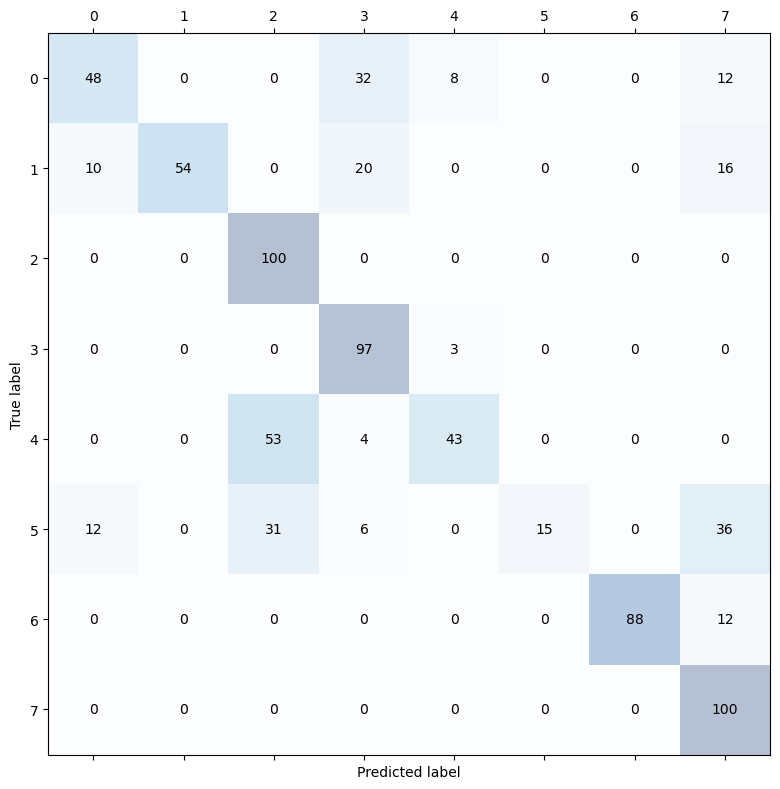

              precision    recall  f1-score   support

           0       0.69      0.48      0.56       100
           1       1.00      0.54      0.70       100
           2       0.54      1.00      0.70       100
           3       0.61      0.97      0.75       100
           4       0.80      0.43      0.56       100
           5       1.00      0.15      0.26       100
           6       1.00      0.88      0.94       100
           7       0.57      1.00      0.72       100

    accuracy                           0.68       800
   macro avg       0.78      0.68      0.65       800
weighted avg       0.78      0.68      0.65       800



In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report
def InceptionV3(input_shape=(128, 128, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((3, 3)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))

    return model

inceptionModel = InceptionV3()
# inceptionModel.summary()

inceptionModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
inception_ModelPred = inceptionModel.predict(x_test)
inception_ModelPred = np.argmax(inception_ModelPred ,axis=1)
# print(len(inception_ModelPred))
# print(inception_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
inception_ModelPredLabel = convert_to_1d_array(inception_ModelPred)
# print(inception_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
inceptionconfusion_matrix = confusion_matrix(true_labels, inception_ModelPredLabel)
# Accuracy_score
inceptionaccuracy_score = accuracy_score(true_labels, inception_ModelPredLabel)
# Recall_score
inceptionrecall_score = recall_score(true_labels, inception_ModelPredLabel, average='macro')
# resaultPredict
inceptionf1_score = f1_score(true_labels, inception_ModelPredLabel, average='macro' )
# Classification_report
inceptionclassification_report = classification_report(true_labels, inception_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(inceptionconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(inceptionconfusion_matrix.shape[0]):
    for j in range(inceptionconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=inceptionconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(inceptionclassification_report)

ResNet

Epoch 1/10
100/100 [==============================] - 69s 644ms/step - loss: 0.3840 - accuracy: 0.8866 - val_loss: 11.9641 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - 65s 645ms/step - loss: 0.0760 - accuracy: 0.9753 - val_loss: 13.5584 - val_accuracy: 0.1250
Epoch 3/10
100/100 [==============================] - 64s 642ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 11.3558 - val_accuracy: 0.1688
Epoch 4/10
100/100 [==============================] - 64s 639ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 11.0208 - val_accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 63s 634ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 1.3670 - val_accuracy: 0.7725
Epoch 6/10
100/100 [==============================] - 63s 632ms/step - loss: 0.0440 - accuracy: 0.9891 - val_loss: 3.0757 - val_accuracy: 0.4462
Epoch 7/10
100/100 [==============================] - 64s 637ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 4.4487 - va

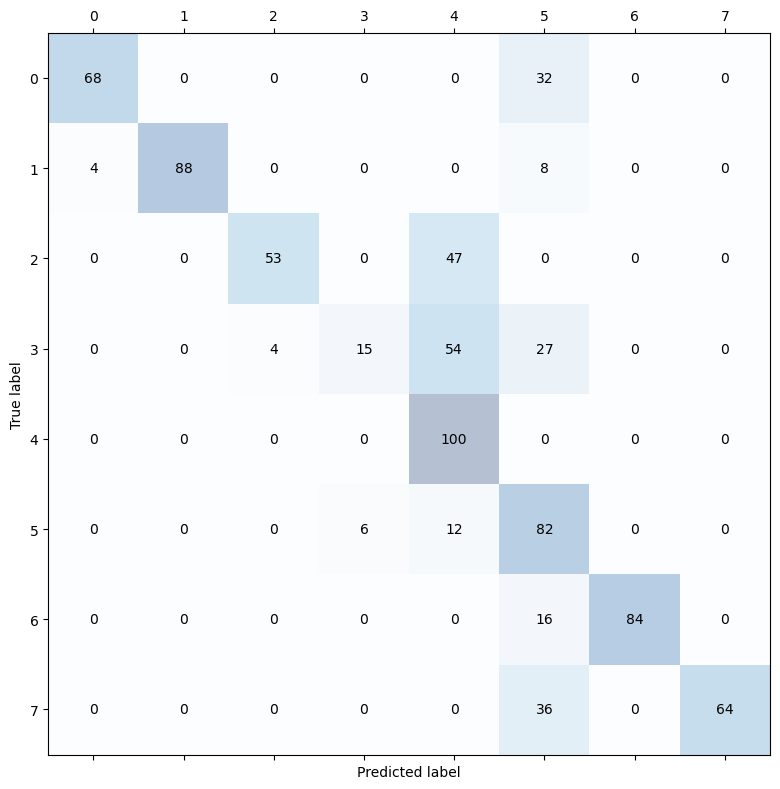

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       100
           1       1.00      0.88      0.94       100
           2       0.93      0.53      0.68       100
           3       0.71      0.15      0.25       100
           4       0.47      1.00      0.64       100
           5       0.41      0.82      0.54       100
           6       1.00      0.84      0.91       100
           7       1.00      0.64      0.78       100

    accuracy                           0.69       800
   macro avg       0.81      0.69      0.69       800
weighted avg       0.81      0.69      0.69       800



In [ ]:
def residual_block(inputs, filters, strides, name):
    """A building block for a ResNet"""
    x = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same', name=name+'_conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
    x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

    x = tf.keras.layers.Conv2D(filters, 3, strides=1, padding='same', name=name+'_conv2')(x)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

    shortcut = tf.keras.layers.Conv2D(filters, 1, strides=strides, padding='same', name=name+'_shortcut')(inputs)
    shortcut = tf.keras.layers.BatchNormalization(name=name+'_shortcut_bn')(shortcut)

    x = tf.keras.layers.add([x, shortcut], name=name+'_add')
    x = tf.keras.layers.ReLU(name=name+'_relu2')(x)
    return x

def ResNet(input_shape, num_classes):
    """A simple ResNet architecture"""
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', name='conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='bn1')(x)
    x = tf.keras.layers.ReLU(name='relu1')(x)
    x = tf.keras.layers.MaxPool2D(3, strides=2, padding='same', name='maxpool')(x)

    x = residual_block(x, 64, 1, name='block1')
    x = residual_block(x, 128, 2, name='block2')
    x = residual_block(x, 256, 2, name='block3')
    x = residual_block(x, 512, 2, name='block4')

    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc')(x)

    model = tf.keras.models.Model(inputs, x, name='ResNet')
    return model

ResNetModel = ResNet((128, 128, 3), 8)
# ResNetModel.summary()

ResNetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNetModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
ResNet_ModelPred = ResNetModel.predict(x_test)
ResNet_ModelPred = np.argmax(ResNet_ModelPred ,axis=1)
# print(len(ResNet_ModelPred))
# print(ResNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
ResNet_ModelPredLabel = convert_to_1d_array(ResNet_ModelPred)
# print(ResNet_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
ResNetconfusion_matrix = confusion_matrix(true_labels, ResNet_ModelPredLabel)
# Accuracy_score
ResNetaccuracy_score = accuracy_score(true_labels, ResNet_ModelPredLabel)
# Recall_score
ResNetrecall_score = recall_score(true_labels, ResNet_ModelPredLabel, average='macro')
# resaultPredict
ResNetf1_score = f1_score(true_labels, ResNet_ModelPredLabel, average='macro' )
# Classification_report
ResNetclassification_report = classification_report(true_labels, ResNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(ResNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(ResNetconfusion_matrix.shape[0]):
    for j in range(ResNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=ResNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(ResNetaccuracy_score)
# print(ResNetrecall_score)
# print(ResNetf1_score)
print(ResNetclassification_report)

In [ ]:
testImgPath = './ImagesDataset/Test/BlackDot/BlackDotTest (54).jpg'
imgori = cv2.imread(testImgPath)
imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
img = cv2.resize(imgori ,(128,128))
rimg = np.array(img)
rimg = rimg.astype('float32')
rimg /= 255.00
rimg = np.reshape(rimg ,(1,128,128,3))
predict = mobilenetModelModify.predict(rimg)
label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
result = label[np.argmax(predict)]
print(predict)
print(result)


1/1 [==============================] - 0s 59ms/step
[[9.9924904e-01 5.5915220e-06 1.9639119e-04 1.4385816e-05 4.9360568e-04
  5.4897250e-06 1.7885098e-06 3.3606229e-05]]
BlackDot
